In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom
from sklearn.linear_model import LinearRegression as LR

In [2]:
n = 10000
df = pd.DataFrame()
df['age'] = np.random.randint(25, 76, size=n)

In [3]:
df

,age
0,40
1,51
2,50
3,39
4,51
...,...
9995,51
9996,66
9997,72
9998,45


In [4]:
a = (1/3)*(np.log(99)-4*np.log(4999))
a

-9.824284278506564

In [5]:
b = (1/75)*np.log(4999/99)
b

0.05229164428371974

In [6]:
def p(x):
    return 1/(1+np.exp(-a-b*x))

In [7]:
df['p'] = df['age'].apply(p)/2
df

,age,p
0,40,0.000219
1,51,0.000389
2,50,0.000369
3,39,0.000208
4,51,0.000389
...,...,...
9995,51,0.000389
9996,66,0.000852
9997,72,0.001165
9998,45,0.000284


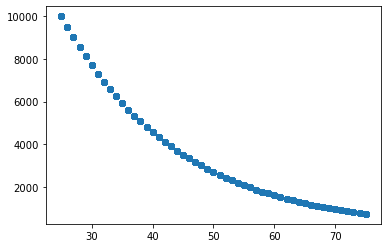

In [8]:
plt.scatter(df['age'],1/df['p'])

In [9]:
df['days'] = df['p'].apply(lambda p:geom(p).rvs())
df

,age,p,days
0,40,0.000219,15150
1,51,0.000389,6619
2,50,0.000369,763
3,39,0.000208,1087
4,51,0.000389,93
...,...,...,...
9995,51,0.000389,2102
9996,66,0.000852,483
9997,72,0.001165,1302
9998,45,0.000284,2425


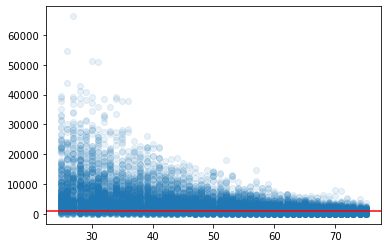

In [10]:
timeout = 1000
plt.scatter(df['age'],df['days'], alpha=.1)
plt.axhline(timeout, color='red')

In [11]:

df['observation'] = np.where(df['days']<=timeout, df['days'], np.nan)
df

,age,p,days,observation
0,40,0.000219,15150,NaN
1,51,0.000389,6619,NaN
2,50,0.000369,763,763.0
3,39,0.000208,1087,NaN
4,51,0.000389,93,93.0
...,...,...,...,...
9995,51,0.000389,2102,NaN
9996,66,0.000852,483,483.0
9997,72,0.001165,1302,NaN
9998,45,0.000284,2425,NaN


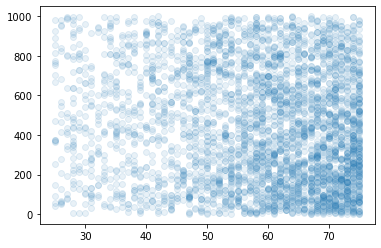

In [12]:
plt.scatter(df['age'], df['observation'], alpha = .1)



In [13]:
ss = df[~df['observation'].isna()]
lr = LR().fit(ss[['age']], ss['observation'])

In [14]:
age_map = {age:(~df[df['age']==age]['observation'].isna()).mean() for age in  df['age'].unique()}

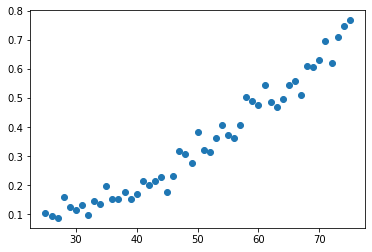

In [15]:
plt.scatter(age_map.keys(), age_map.values())

In [16]:
(df['observation'].isna()).mean()

0.6478

In [17]:
def estimated_days(age, age_map=age_map, timeout=timeout):
    S = age_map[age]
    return timeout + (1/(1-(1-S)**(1/timeout)))

In [18]:
df['estimated_days'] = np.where(df['observation'].isna(), df['age'].apply(estimated_days), df['observation'] )
df

,age,p,days,observation,estimated_days
0,40,0.000219,15150,NaN,6337.837040
1,51,0.000389,6619,NaN,3597.523285
2,50,0.000369,763,763.0,763.000000
3,39,0.000208,1087,NaN,7005.146803
4,51,0.000389,93,93.0,93.000000
...,...,...,...,...,...
9995,51,0.000389,2102,NaN,3597.523285
9996,66,0.000852,483,483.0,483.000000
9997,72,0.001165,1302,NaN,2028.702049
9998,45,0.000284,2425,NaN,6109.198376


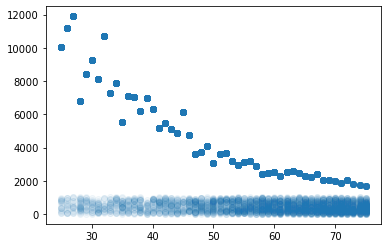

In [19]:
plt.scatter(df['age'], df['estimated_days'], alpha = .05)

In [20]:
results = df.groupby('age').mean()[['estimated_days']].reset_index()
results


,age,estimated_days
0,25,9045.710116
1,26,10213.165018
2,27,10905.769817
3,28,5812.572779
4,29,7454.312498
5,30,8259.464543
6,31,7116.329850
7,32,9696.514107
8,33,6287.472237
9,34,6911.149639


In [21]:
results['p'] = 1/results['estimated_days']

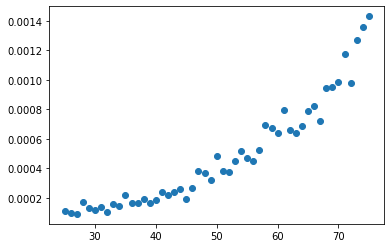

In [32]:
plt.scatter(results['age'], results['p'])

In [23]:
results['log_odds'] = np.log(results['p']/(1-results['p']))
results

,age,estimated_days,p,log_odds
0,25,9045.710116,0.000111,-9.109935
1,26,10213.165018,0.000098,-9.231335
2,27,10905.769817,0.000092,-9.296956
3,28,5812.572779,0.000172,-8.667607
4,29,7454.312498,0.000134,-8.916414
5,30,8259.464543,0.000121,-9.018994
6,31,7116.329850,0.000141,-8.870007
7,32,9696.514107,0.000103,-9.179419
8,33,6287.472237,0.000159,-8.746155
9,34,6911.149639,0.000145,-8.840747


In [24]:
lr = LR().fit(results[['age']], results.log_odds)

In [25]:
lr.intercept_

-10.539054066451516

In [26]:
lr.coef_

array([0.05240374])

In [27]:
a

-9.824284278506564

In [28]:
b

0.05229164428371974

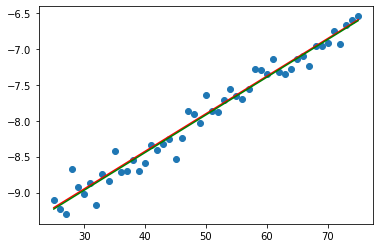

In [35]:
plt.scatter(results['age'], results['log_odds'])
plt.plot(results['age'], results['age']*b+a-np.log(2), color = 'red')
plt.plot(results['age'], lr.predict(results[['age']]), color = 'green')

In [36]:
results['target']= results['p'].apply(lambda p:geom(p).cdf(18*30)-geom(p).cdf(6*30))
results

,age,estimated_days,p,log_odds,target
0,25,9045.710116,0.000111,-9.109935,0.038250
1,26,10213.165018,0.000098,-9.231335,0.034031
2,27,10905.769817,0.000092,-9.296956,0.031941
3,28,5812.572779,0.000172,-8.667607,0.058229
4,29,7454.312498,0.000134,-8.916414,0.046025
5,30,8259.464543,0.000121,-9.018994,0.041733
6,31,7116.329850,0.000141,-8.870007,0.048101
7,32,9696.514107,0.000103,-9.179419,0.035777
8,33,6287.472237,0.000159,-8.746155,0.054082
9,34,6911.149639,0.000145,-8.840747,0.049455


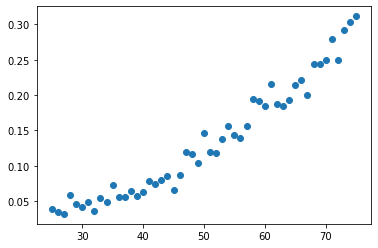

In [37]:
plt.scatter(results['age'], results['target'])

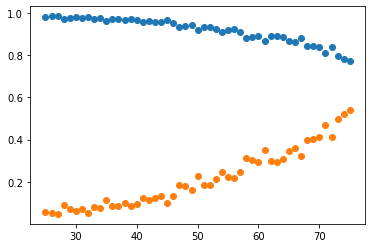

In [39]:
plt.scatter(results['age'], results['p'].apply(lambda p:1-geom(p).cdf(30*6)))
plt.scatter(results['age'], results['p'].apply(lambda p:geom(p).cdf(30*18)))